In [12]:
import rospy
rospy.init_node('blockly_server', anonymous=True)
# Copied imports for setup_miro here to allow execution of other functions

from miro_msgs.msg import platform_control
from miro_constants import miro
from geometry_msgs.msg import Twist
from sensor_msgs.msg import Range, Image
from std_msgs.msg import Float32MultiArray
import sys
import rospy
import subprocess
import rosnode
import numpy as np
import cv2
import time
import os
import math
import rospkg
global q, pub, current_robot, rate

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# These global variables need to be added inside of each function

In [13]:
# Colour: 230
# Group: Miro
# GroupColour: 100
# Interface: dropdown
# UserParameters: [Simulation, Physical]
# CodeParameters: [sim, physical]
def setup_miro(miro_type):
    global q, pub, current_robot, rate
    from miro_msgs.msg import platform_control
    from miro_constants import miro
    from geometry_msgs.msg import Twist
    from sensor_msgs.msg import Range, Image
    from std_msgs.msg import Float32MultiArray
    import sys
    import rospy
    import subprocess
    import rosnode
    import numpy as np
    import cv2
    import time
    import os
    import math
    import rospkg

    if miro_type == "physical":
        current_robot = 'rob01'
    else:
        current_robot = 'sim01'

    pub = rospy.Publisher('/miro/' + current_robot + '/platform/control',
        platform_control, queue_size=10)
    rate = rospy.Rate(10)
    q = platform_control()

In [15]:
setup_miro("physical")

In [17]:
q = platform_control()
q.ear_rotate = [1.0, 1.0]
for k in range(10):
    pub.publish(q)
    rate.sleep()

In [19]:
move_backward()

KeyboardInterrupt: 

In [18]:
# Colour: 230
# Group: Miro_Motion
def move_backward():
    global q, pub, current_robot, rate
    body_vel = Twist()
    body_vel.angular.x = 0
    body_vel.linear.x = -500
    q.body_vel = body_vel

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    
    pub.publish(q)
    body_vel.linear.x = 0
    q.body_vel = body_vel
    time.sleep(1.5)
    pub.publish(q)

In [8]:
# Colour: 230
# Group: Miro_Motion
# GroupColour: 200
def move_forward():
    global q, pub, current_robot, rate
    body_vel = Twist()
    body_vel.angular.x = 0
    body_vel.linear.x = +500
    q.body_vel = body_vel

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    pub.publish(q)
    body_vel.linear.x = 0
    q.body_vel = body_vel
    time.sleep(1.5)
    pub.publish(q)	#Allow time for the move to be executed

In [9]:
# Colour: 230
# Group: Miro_Motion
def turn_left():
    global q, pub, current_robot, rate
    body_vel = Twist()
    body_vel.angular.z = +0.785398
    q.body_vel = body_vel

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    pub.publish(q)
    time.sleep(2)
    body_vel.angular.z = 0#Allow time for the move to be executed

In [10]:
# Colour: 230
# Group: Miro_Motion
def turn_right():
    global q, pub, current_robot, rate
    body_vel = Twist()
    body_vel.angular.z = -0.785398
    q.body_vel = body_vel

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    pub.publish(q)
    time.sleep(2)
    body_vel.angular.z = 0#Allow time for the move to be executed

In [11]:
# Interface: dropdown
# UserParameters: [Up, Down, Centre]
# CodeParameters: [L_UP, L_DOWN, L_CENTRE]
# Colour: 180
# Group: Miro_Motion
def lift_neck(dropdown_lift):
    global q, pub, current_robot, rate
    if dropdown_lift == 'L_UP':
        direction = miro.MIRO_LIFT_MIN_RAD
    elif dropdown_lift == 'L_DOWN':
        direction = miro.MIRO_LIFT_MAX_RAD
    else:
        direction = (miro.MIRO_LIFT_MIN_RAD + miro.MIRO_LIFT_MAX_RAD )/2
    q.body_vel = Twist()
    q.body_config[1] = direction
    q.body_config_speed[1] = miro.MIRO_P2U_W_LEAN_SPEED_INF

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    pub.publish(q)
    time.sleep(1.5)#Allow time for the move to be executed

In [12]:
# Interface: dropdown
# UserParameters: [Up, Down, Centre]
# CodeParameters: [P_UP, P_DOWN, P_CENTRE]
# Colour: 180
# Group: Miro_Motion
def pitch_neck(dropdown_pitch):
    global q, pub, current_robot, rate
    if dropdown_pitch == 'P_UP':
        direction = miro.MIRO_PITCH_MIN_RAD
    elif dropdown_pitch == 'P_DOWN':
        direction = miro.MIRO_PITCH_MAX_RAD
    else:
        direction = (miro.MIRO_PITCH_MIN_RAD + miro.MIRO_PITCH_MAX_RAD )/2
    
    q.body_vel = Twist()
    q.body_config[3] = direction
    q.body_config_speed[3] = miro.MIRO_P2U_W_LEAN_SPEED_INF

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    pub.publish(q)
    time.sleep(1.5)#Allow time for the move to be executed

In [13]:
# Interface: dropdown
# UserParameters: [Right, Left, Centre]
# CodeParameters: [Y_RIGHT, Y_LEFT, Y_CENTRE]
# Colour: 180
# Group: Miro_Motion
def yaw_neck(dropdown_yaw):
    global q, pub, current_robot, rate
    if dropdown_yaw == 'Y_RIGHT':
        direction = miro.MIRO_YAW_MAX_RAD
    elif dropdown_yaw == 'Y_LEFT':
        direction = miro.MIRO_YAW_MIN_RAD
    else:
        direction = (miro.MIRO_YAW_MIN_RAD + miro.MIRO_YAW_MAX_RAD )/2
    
    q.body_vel = Twist()
    q.body_config[2] = direction
    q.body_config_speed[2] = miro.MIRO_P2U_W_LEAN_SPEED_INF

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    pub.publish(q)
    time.sleep(1.5)#Allow time for the move to be executed

In [14]:
# Interface: dropdown
# UserParameters: [Droop, Neutral, Wagging]
# CodeParameters: [Droop, Neutral, Wagging]
# Colour: 180
# Group: Miro_Motion
def wag_tail(dropdown_wag):
    global q, pub, current_robot, rate
    
    if dropdown_wag == 'Droop':
        q.tail = -1
    elif dropdown_wag == 'Neutral':
        q.tail = 0
    else:
        q.tail = 1

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    pub.publish(q)
    time.sleep(1.5)
    q.tail = 0#Allow time for the move to be executed

In [ ]:
# Interface: dropdown
# UserParameters: [Droop, Neutral, Wagging]
# CodeParameters: [Droop, Neutral, Wagging]
# Colour: 180
# Group: Miro_Motion
def move_ears(dropdown_ears):
    global q, pub, current_robot, rate
    
    if dropdown_ears == 'Droop':
        q.ear_rotate = [0, 0]
    elif dropdown_ears == 'Neutral':
        q.ear_rotate = [-1, -1]
    else:
        q.tail = 1

    #ensures that at least one node is connected before sending message
    while(pub.get_num_connections() == 0):
        rate.sleep()
    pub.publish(q)
    time.sleep(1.5)#Allow time for the move to be executed

In [ ]:
move_backward()

In [15]:
# Colour: 160
# Group: Miro_Sensors
def get_distance():
    global q, pub, current_robot, rate
    msg_distance = rospy.wait_for_message('/miro/' + current_robot + '/sensors/sonar_range', Range, timeout=1)
    return msg_distance.range

In [16]:
# Colour: 180
# Show Image
# Group: Miro_Sensors
# GroupColour: 180
def capture_image():
    timestr = time.strftime("%d-%m-%Y_%H-%M-%S.png")

    # Ros Messages	 
    from sensor_msgs.msg import CompressedImage

    msg_image = rospy.wait_for_message('/miro/'  + current_robot + '/platform/camr/compressed', CompressedImage, timeout=7)
    np_arr = np.frombuffer(msg_image.data, np.uint8)
    image_np = cv2.imdecode(np_arr, 1)
    


    rospack = rospkg.RosPack()
    images_path = '/usr/local/src/robot/blockly_ws/install_isolated/share/robot_blockly/frontend/pages/images/'
    cv2.imwrite(images_path+ 'image_' + timestr, image_np)

    #cv2.imwrite('/home/erle/spider_ws/install_isolated/share/robot_blockly/frontend/pages/images/image_' + timestr, image_np)
    #images_path = "/home/erle/spider_ws/install_isolated/share/robot_blockly/frontend/pages/images/"

    files = len(os.listdir(images_path)) #amount of files in /frontend/images/ folder

    if files > 7 : #allow 5 images max
        os.system("find "+images_path+" -name '*.png' | xargs ls -t | tail -n 1 | xargs rm")#remove oldest image

In [53]:
# Interface: colour_wheel
# Colour: 180
# Group: Miro_Utility
def get_colour_pixels(hex_string):
    global q, pub, current_robot, rate
    hex_str = hex_string.lstrip("#")
    lv = len(hex_str)
    colorRGB = tuple(int(hex_str[i:i+ lv // 3], 16) for i in range(0, lv, lv // 3))
    colorHSV = np.full([1,1,3], colorRGB, dtype=np.uint8)
    colorHSV = cv2.cvtColor(colorHSV, cv2.COLOR_RGB2HSV)[0,0]
    
    image_l = rospy.wait_for_message('/miro/' + current_robot + '/platform/caml', Image, timeout=10)
    image_r = rospy.wait_for_message('/miro/' + current_robot + '/platform/camr', Image, timeout=10)
    h  = image_l.height
    w  = image_l.width
    data_l = np.frombuffer(image_l.data, np.uint8)
    data_l = np.reshape(data_l, (h, w, 3))
    
    data_r = np.frombuffer(image_r.data, np.uint8)
    data_r = np.reshape(data_r, (h, w, 3))
    
    frac = int(round(w/2))
    data = np.hstack([data_l[:,-frac:,:], 
                      data_r[:,:frac,:]])
    
    hsv_image = cv2.cvtColor(data, cv2.COLOR_RGB2HSV)

    offset = 30
    lower = np.array([colorHSV[0]-offset, 0, 0])
    upper = np.array([colorHSV[0]+offset, 255, 255])

    mask = cv2.inRange(hsv_image, lower, upper)

    result_left = float(cv2.countNonZero(mask[:,:frac])) / mask.size
    result_right = float(cv2.countNonZero(mask[:,-frac:])) / mask.size
    
    result = result_left + result_right

    return result

In [53]:
# Interface: colour_wheel
# Colour: 180
# Group: Miro_Utility
def get_colour_direction(hex_string):
    global q, pub, current_robot, rate
    hex_str = hex_string.lstrip("#")
    lv = len(hex_str)
    colorRGB = tuple(int(hex_str[i:i+ lv // 3], 16) for i in range(0, lv, lv // 3))
    colorHSV = np.full([1,1,3], colorRGB, dtype=np.uint8)
    colorHSV = cv2.cvtColor(colorHSV, cv2.COLOR_RGB2HSV)[0,0]
    
    image_l = rospy.wait_for_message('/miro/' + current_robot + '/platform/caml', Image, timeout=10)
    image_r = rospy.wait_for_message('/miro/' + current_robot + '/platform/camr', Image, timeout=10)
    h  = image_l.height
    w  = image_l.width
    data_l = np.frombuffer(image_l.data, np.uint8)
    data_l = np.reshape(data_l, (h, w, 3))
    
    data_r = np.frombuffer(image_r.data, np.uint8)
    data_r = np.reshape(data_r, (h, w, 3))
    
    frac = int(round(w/2))
    data = np.hstack([data_l[:,-frac:,:], 
                      data_r[:,:frac,:]])
    
    hsv_image = cv2.cvtColor(data, cv2.COLOR_RGB2HSV)

    offset = 30
    lower = np.array([colorHSV[0]-offset, 0, 0])
    upper = np.array([colorHSV[0]+offset, 255, 255])

    mask = cv2.inRange(hsv_image, lower, upper)

    result_left = float(cv2.countNonZero(mask[:,:frac])) / mask.size
    result_right = float(cv2.countNonZero(mask[:,-frac:])) / mask.size
    
    result = result_left + result_right
    if abs(result_left - result_right) < 0.05:
        result = 0 
    else:
        if result_left > result_right:
            result = -1
        else:
            result = +1

    return result

0.0

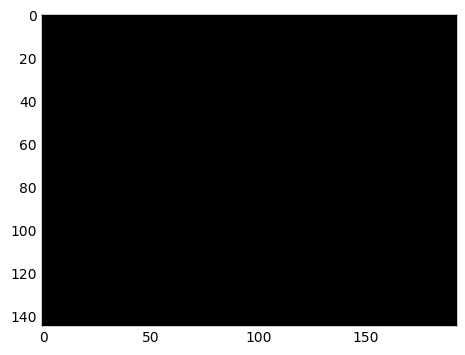

In [54]:
get_cam_colour("#3333ff")

/usr/local/src/robot/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


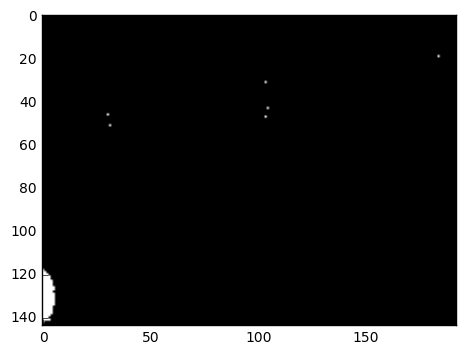

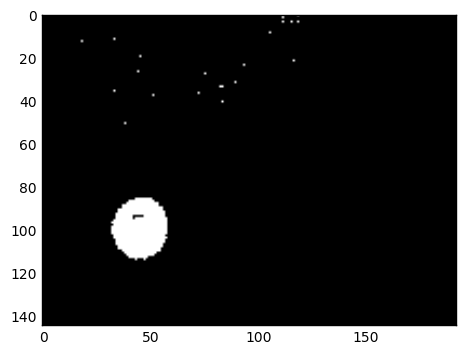

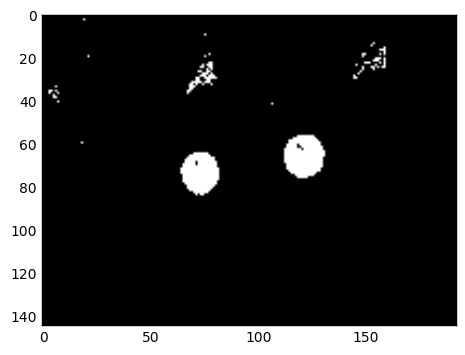

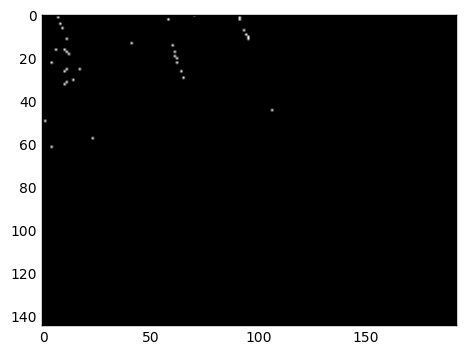

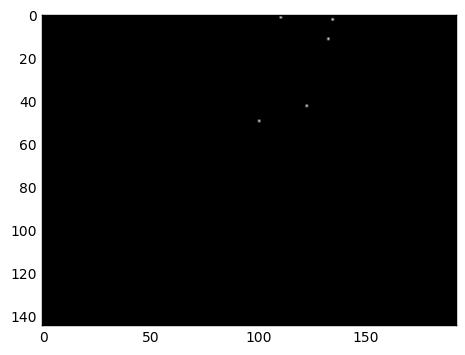

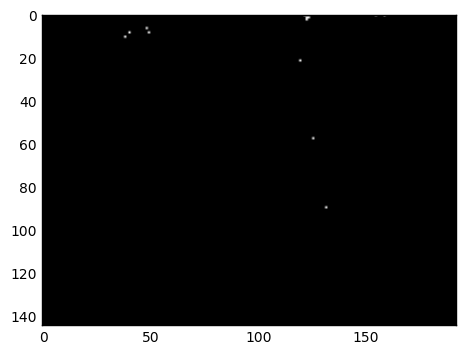

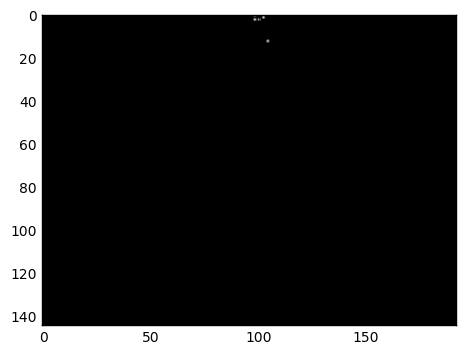

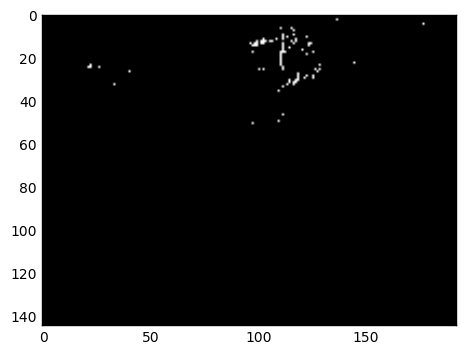

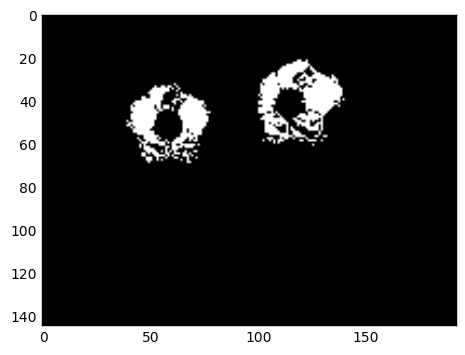

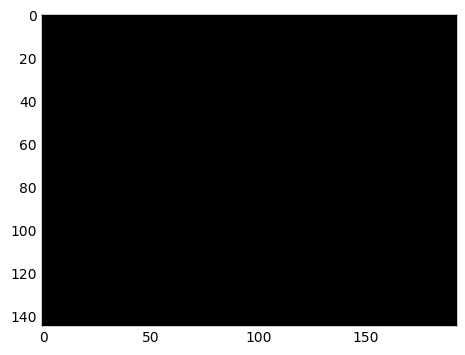

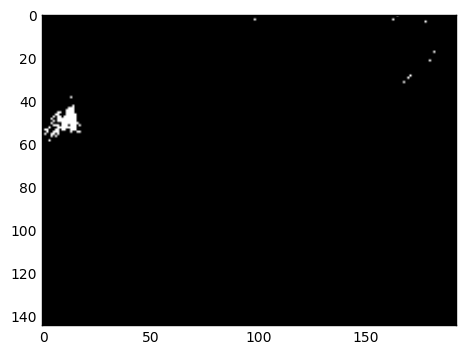

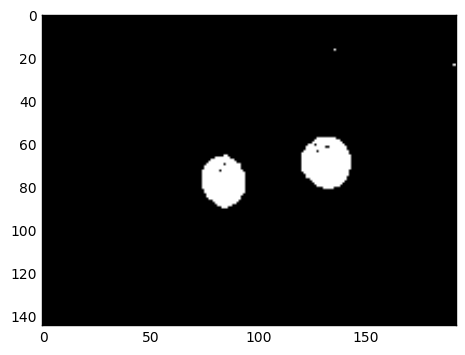

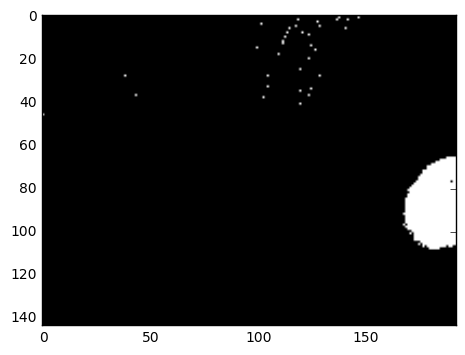

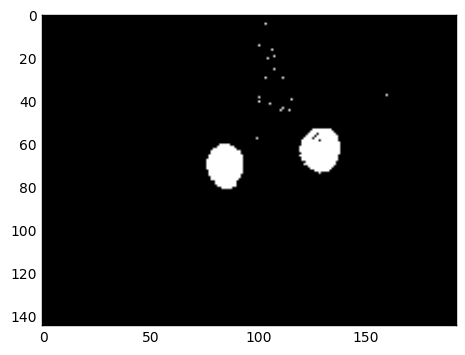

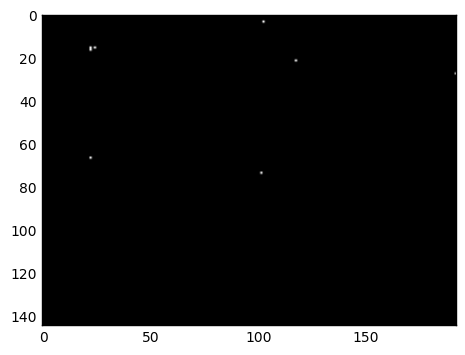

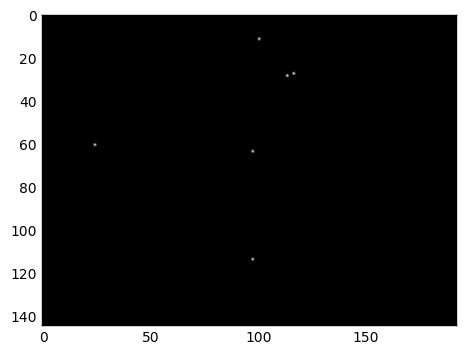

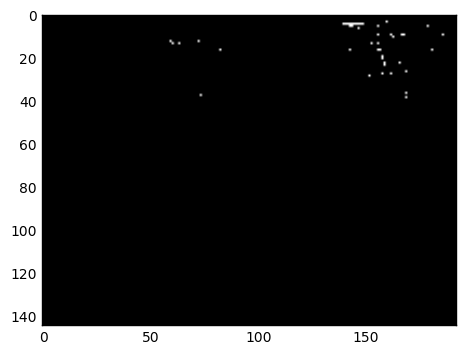

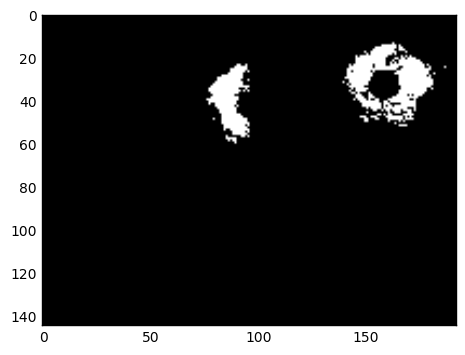

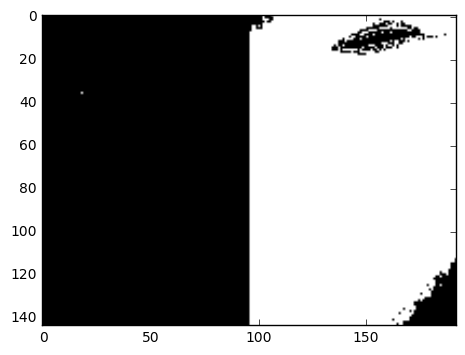

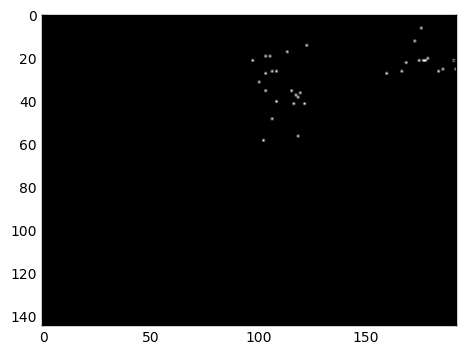

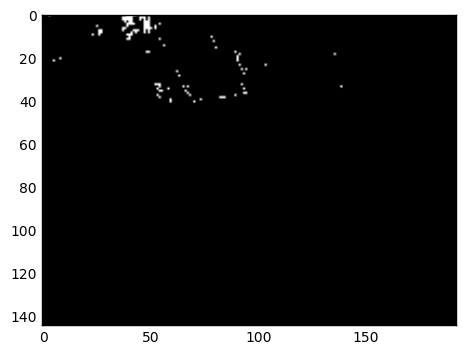

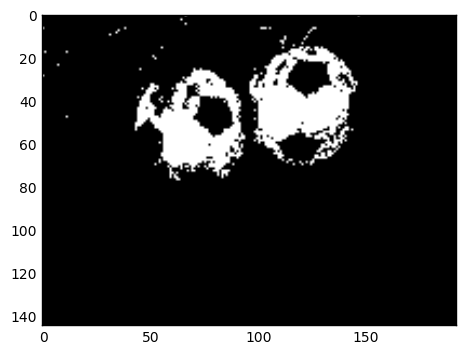

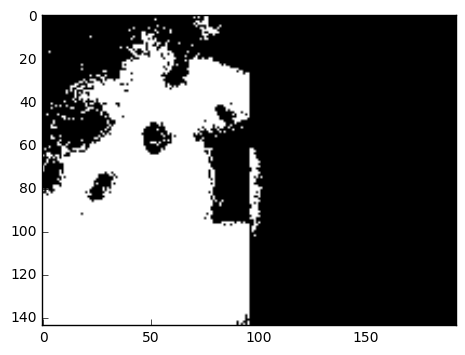

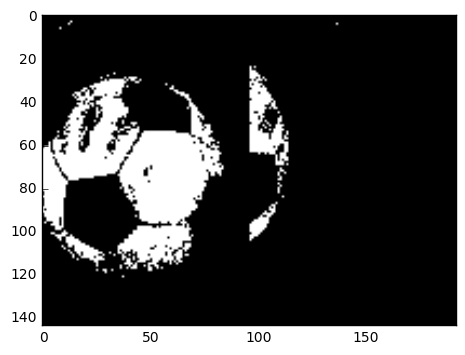

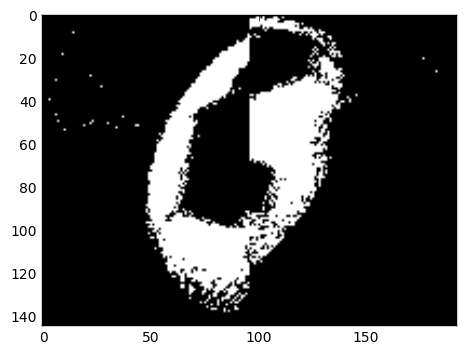

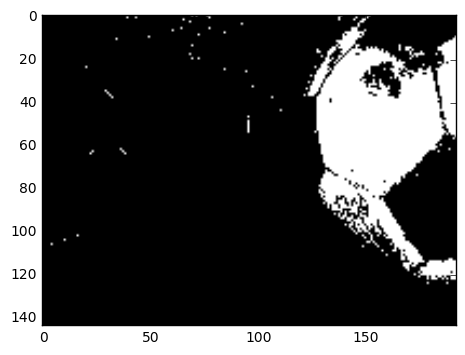

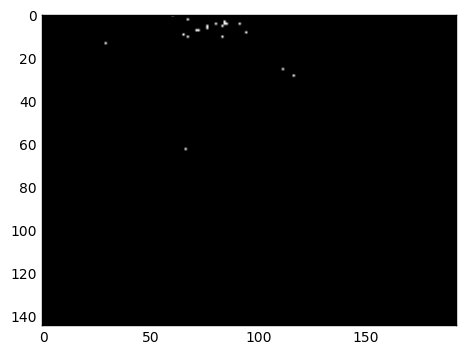

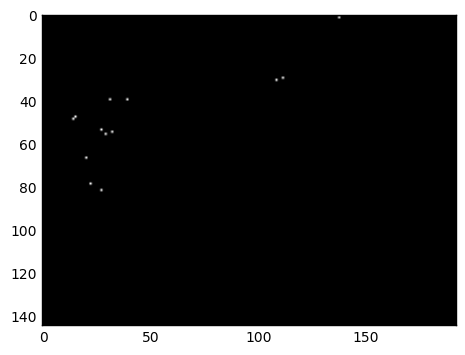

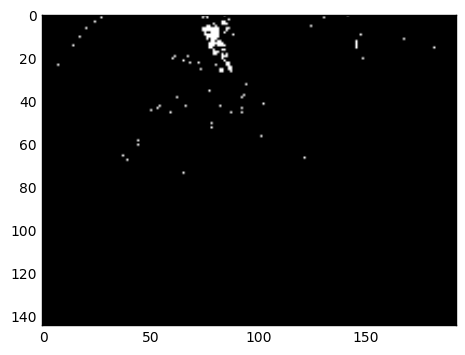

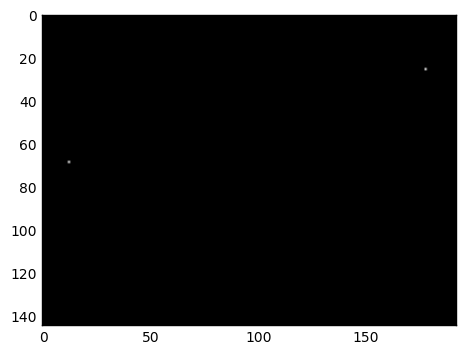

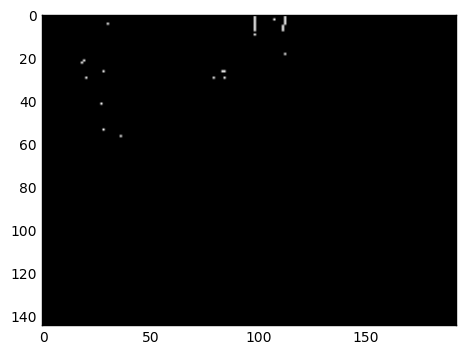

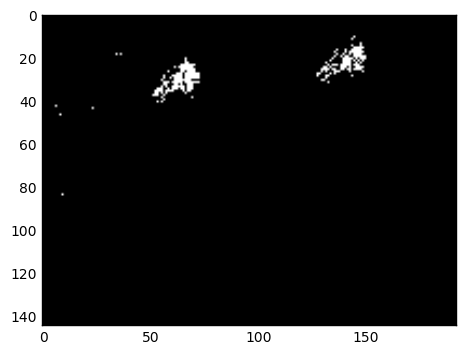

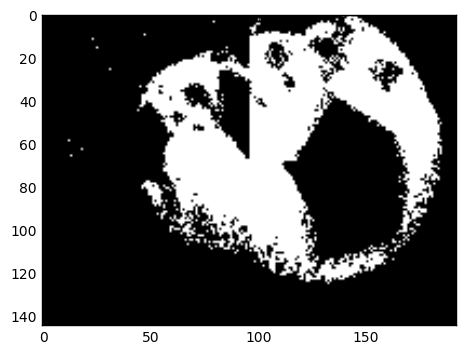

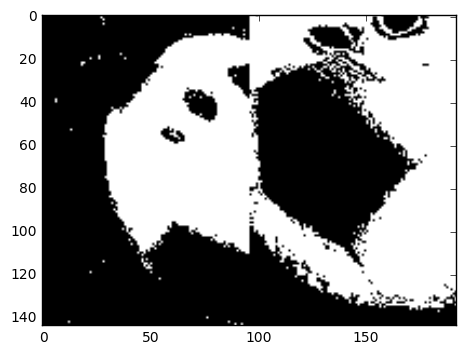

In [55]:
lift_neck("L_DOWN")
pitch_neck("P_DOWN")
blue_pix = get_cam_colour("#3333ff")

while blue_pix < 0.1:
    while blue_pix < 0.05:
        turn_left()
        blue_pix = get_cam_colour("#3333ff")
    move_forward()
    blue_pix = get_cam_colour("#3333ff")
    if blue_pix < 0:
        turn_right()
    else:
        turn_left()
        
yaw_neck("Y_CENTER")
lift_neck("L_UP")
lift_neck("L_DOWN")
lift_neck("L_UP")
lift_neck("L_DOWN")
lift_neck("L_UP")

In [27]:
# Colour: 180
# Group: Miro_Utility
def find_circle():
    # Extract circles
    # YCrCb YUV HSV GRAY LAB LUV HLS
    output = data.copy()
    methods = [cv2.COLOR_RGB2YCrCb, cv2.COLOR_RGB2YUV, cv2.COLOR_RGB2HSV, 
               cv2.COLOR_RGB2GRAY, cv2.COLOR_RGB2LAB, cv2.COLOR_RGB2LUV, cv2.COLOR_RGB2HLS]

    dp = 3 #accumulator
    minDist = 1 # minimum distance between circles
    param1 = 100
    param2 = 50
    minRad = 5
    maxRad = 0
    num_iters = 0

    circles = []
    for m in methods:
        use = cv2.cvtColor(data, m)

        if len(use.shape) == 2:
            use = use[:,:,None]

        for dim in range(use.shape[2]):
            num_iters += 1
            circs = cv2.HoughCircles(use[:,:, dim] ,cv2.HOUGH_GRADIENT, dp, minDist,
                                     param1=param1,param2=param2,minRadius=minRad,maxRadius=maxRad)
            if circs is not None:
                circles.append(np.round(circs[0]).astype("int"))

    lin = None
    if len(circles) > 0:
        for p in circles:
            if lin is None:
                lin = p
            else:
                lin = np.vstack([lin, p])

        threshx = 5
        threshy = 5

        for a in range(lin.shape[0]):
            for b in range(lin.shape[0]):
                if abs(lin[b][0] - lin[a][0]) < threshx and abs(lin[b][1] - lin[a][1]) < threshy:
                    lin[b] = lin[a]

        unique, counts = np.unique(lin[:,:3], axis=0, return_counts=True)
        unique_counts = np.hstack([unique, counts[:, None]])

        count_thresh = np.percentile(counts, 90)
        if count_thresh > num_iters*0.5:
            result = True
        else:
            result = False
        
        # ensure at least some circles were found
        mask_list = []
        if unique_counts.shape[0] > 0:
            # loop over the (x, y) coordinates and radius of the circles
            for x,y,r,c in unique_counts:
                if c > count_thresh:
                    # draw the circle in the output image
                    this_mask = np.full(output.shape[:2], 0, dtype=np.uint8)
                    cv2.circle(this_mask, (x, y), r, (255, 255, 255), -1)
                    mask_list.append(this_mask)

        res = np.full(output.shape[:2], 0, dtype=np.uint8)
        if len(mask_list) > 0:
            # show the output image
            for m in mask_list:
                res = cv2.bitwise_or(res, m)
            output = cv2.bitwise_and(output,output,mask = res)
    else:
        result = False
    return result